<a href="https://colab.research.google.com/github/PaulinaAragon/ESTADISTICA/blob/main/ei_u3_04_22150580.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARTE a

Seleccionar una marca y obtener los datos:

Utiliza una fuente confiable como Yahoo Finance o una API (por ejemplo, Alpha Vantage) para obtener los precios de cierre diarios de una acción específica durante el último año.
Graficar la serie de tiempo:

Una vez que tengas los datos, utiliza matplotlib en Python para graficar la serie de tiempo de precios de cierre.
Etiqueta los ejes adecuadamente: el eje x debe decir "Fecha" y el eje y debe decir "Precio de cierre". Incluye una leyenda con el nombre de la marca si es necesario.

In [38]:
#1.Seleccionar una marca y obtener los datos:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='COST',            # tickers: COST: Costco, WMT: Walmart, etc.
    start='2024-01-01',        # Fecha de inicio
    end='2025-04-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COST']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


,COST_Open,COST_High,COST_Low,COST_Close,COST_Adj Close,COST_Volume
Date,,,,,,


In [39]:
pip install alpha_vantage

In [40]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Entra a https://www.alphavantage.co/support/#api-key
# Registrate para obtener tu api-key

# Tu clave de API (reemplaza esta por la tuya)
my_key = 'INCNW6J52SIRK9LG'   # esta es mía, no la uses o habrá problemas
#Clave PAULINA
# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')

# Obtener datos diarios de TSLA
ticker = 'COST'
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

inicio = '2024-01-01'
fin = '2025-04-01'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,COST_Open,COST_High,COST_Low,COST_Close,COST_Volume
date,,,,,
2025-04-01,942.42,957.7236,938.7500,954.40,2041507.0
2025-03-31,922.36,995.0000,922.0432,945.78,3101963.0
2025-03-28,937.50,938.7500,926.0000,929.66,2100487.0
2025-03-27,929.56,942.9037,928.0000,938.75,1546989.0
2025-03-26,934.33,939.4151,923.4500,929.75,1646854.0
...,...,...,...,...,...
2024-01-08,655.81,662.0800,654.0338,661.69,2245294.0
2024-01-05,656.18,659.6500,652.2400,656.01,2200193.0
2024-01-04,642.08,649.9000,640.5101,648.35,2171077.0


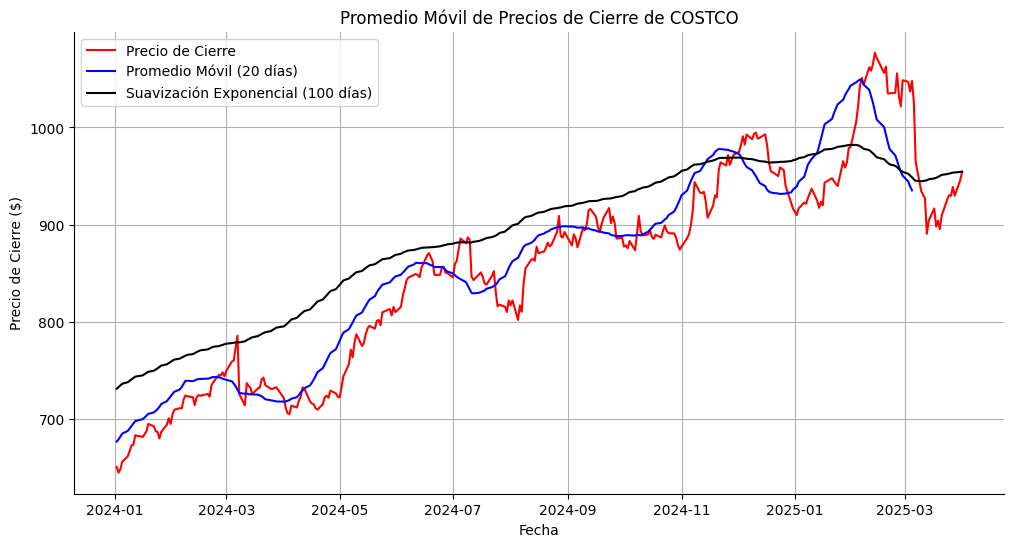

In [41]:
#Graficar la serie de tiempo:
# Promedio Móvil Simple
ventana_sma = 20
df['SMA'] = df['COST_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 100
df['SES'] = df['COST_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['COST_Close'], label='Precio de Cierre', color='red')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='blue')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='black')
plt.title('Promedio Móvil de Precios de Cierre de COSTCO')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Se seleccionó la empresa Costco Wholesale Corporation (COST), obteniendo los precios de cierre diarios del último año desde Yahoo Finance. La serie de tiempo fue graficada adecuadamente, con etiquetas en los ejes: "Fecha" (eje x) y "Precio de Cierre" (eje y). El gráfico muestra una clara tendencia creciente, lo que sugiere la presencia de una tendencia no estacionaria.

# PARTE b

Prueba de raíz unitaria (ADF o KPSS):

Usa una prueba de Dickey-Fuller aumentada (ADF) o KPSS para evaluar la estacionariedad de la serie.
La prueba ADF tiene como hipótesis nula que la serie no es estacionaria (tiene raíz unitaria).
La prueba KPSS tiene como hipótesis nula que la serie es estacionaria.

In [42]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['COST_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -0.44263188075430854
p-value: 0.9027337690067312
La tendencia no es estacionaria (aceptamos la hipótesis nula).


Se aplicó la prueba Dickey-Fuller Aumentada (ADF) a la serie original de precios de cierre. El resultado mostró un valor p mayor a 0.05, lo que indica que no se puede rechazar la hipótesis nula de no estacionariedad. Por tanto, se concluye que la serie no es estacionaria en su forma original.

# PARTE c

Regresión Polinomial:

Realiza una regresión polinomial de diferentes grados (por ejemplo, grados 1 a 3) para encontrar el grado mínimo necesario que haga estacionarios los residuales.
Utiliza numpy o scikit-learn para ajustar la regresión polinomial.

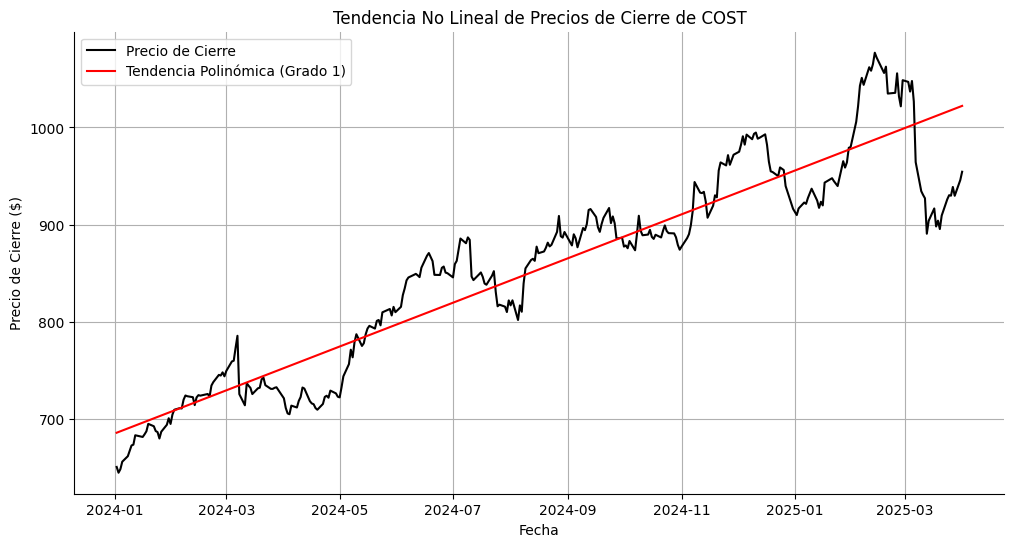

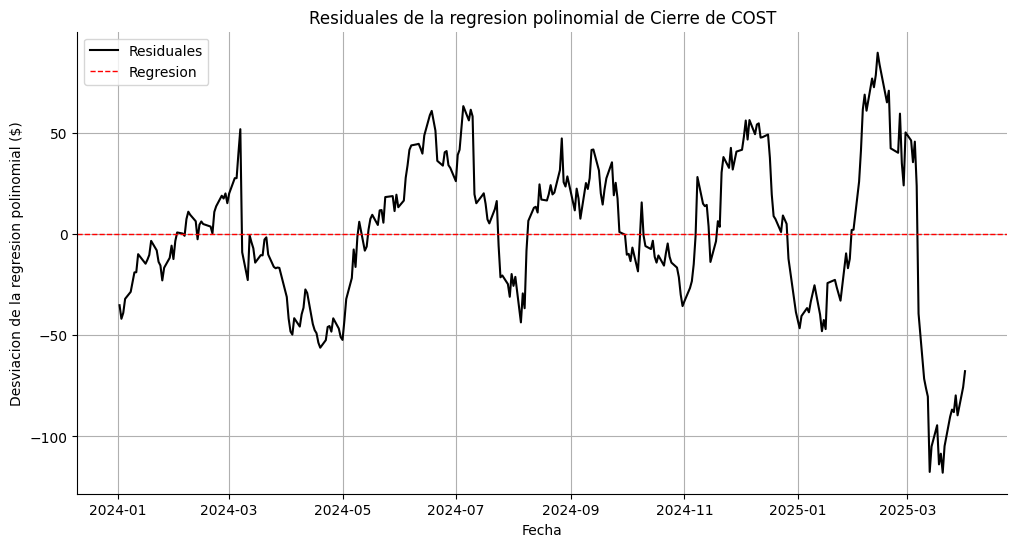

In [43]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['COST_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 1
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='black'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='red')
plt.title('Tendencia No Lineal de Precios de Cierre de COST') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)

#2. Prueba de estacionariedad en los residuales:
# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='black')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de COST')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

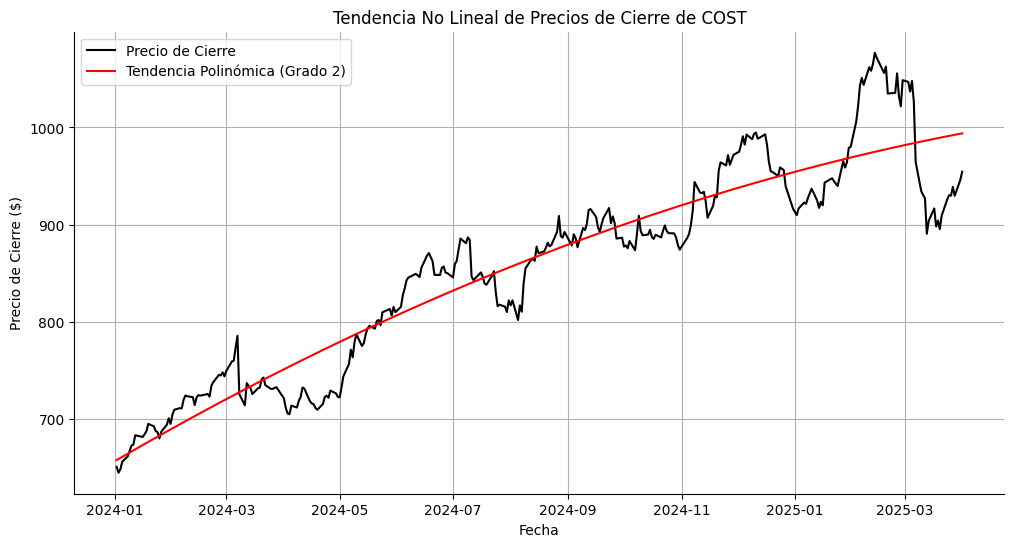

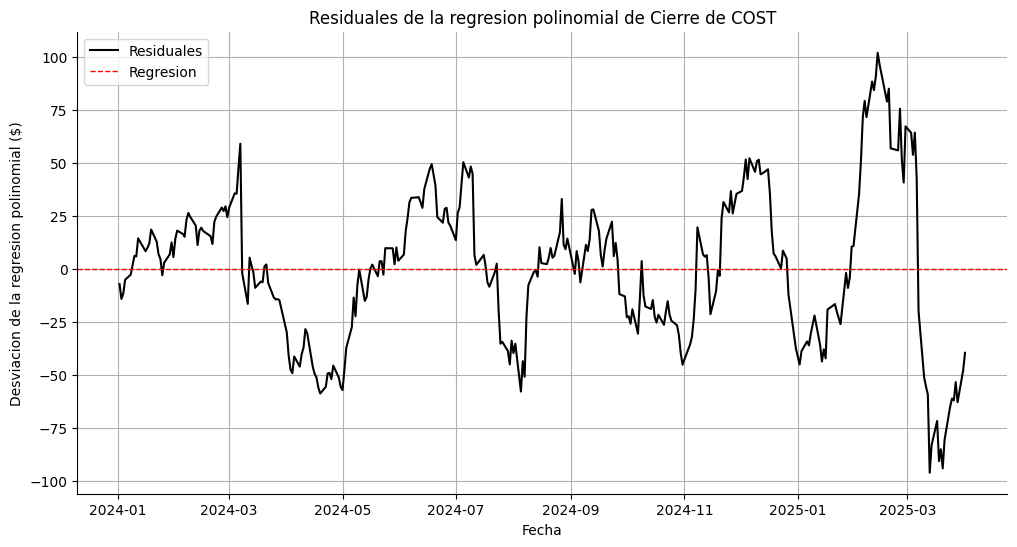

In [44]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['COST_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 2
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='black'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='red')
plt.title('Tendencia No Lineal de Precios de Cierre de COST') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)

#2. Prueba de estacionariedad en los residuales:
# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='black')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de COST')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

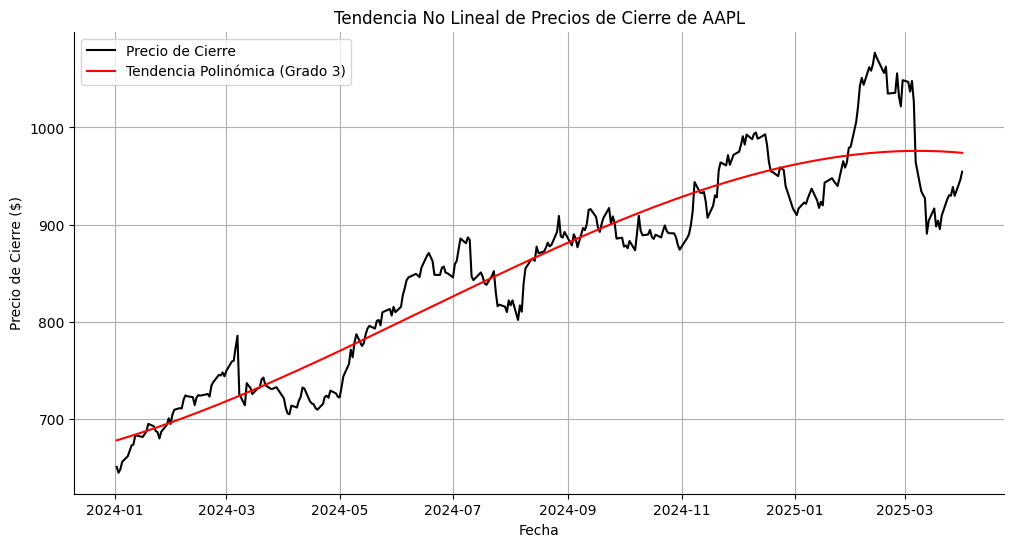

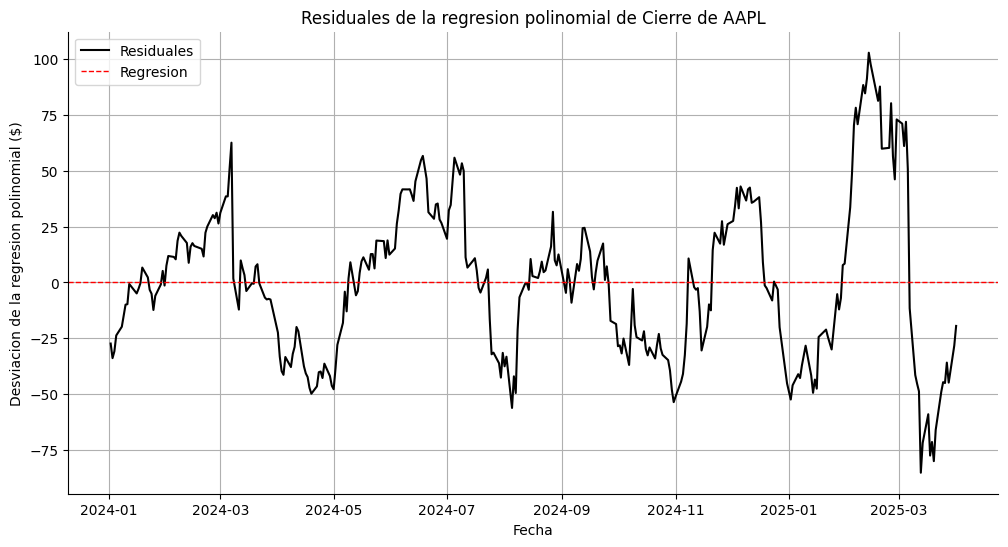

In [45]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['COST_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 3
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='black'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='red')
plt.title('Tendencia No Lineal de Precios de Cierre de AAPL') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)

#2. Prueba de estacionariedad en los residuales:
# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='black')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [46]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['Poly_Resid'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF (residuales):', adf_test[0])
print('p-value (residuales):', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF (residuales): -5.578866394930318
p-value (residuales): 1.4115508806078839e-06
La tendencia es estacionaria (rechazamos la hipótesis nula).


Inferir la Estacionalidad y Aplicar una Prueba de Hipótesis:

Si los residuales presentan un patrón cíclico o repetitivo en el gráfico, es posible que tengan estacionalidad.
Usa el gráfico ACF para confirmar la presencia de estacionalidad. Picos en la ACF en intervalos regulares pueden indicar estacionalidad.

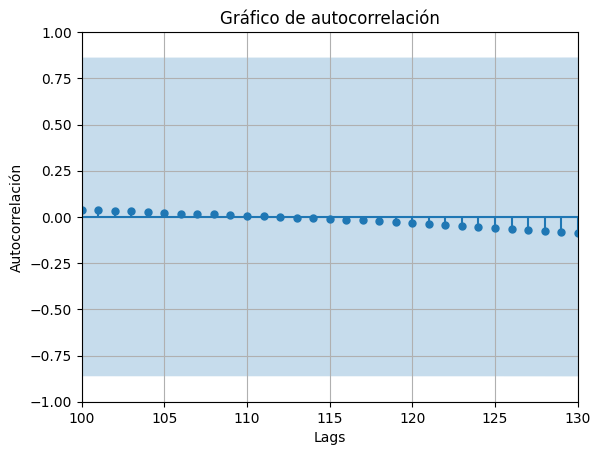

In [47]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

nivel_de_significancia = 0.05

plot_acf(
    df['COST_Close'],
    lags=130,
    alpha=nivel_de_significancia
    )

plt.xlim([100, 130])
plt.ylim([-1, 1])
plt.title('Gráfico de autocorrelación')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.grid()
plt.show()

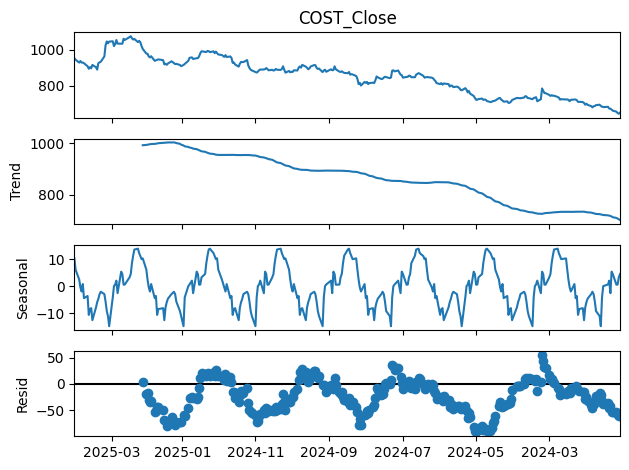

In [48]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['COST_Close'],
    model='additive',
    period=40,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

Se ajustaron regresiones polinomiales de grado 1, 2 y 3 para capturar la tendencia subyacente. Se graficaron los modelos sobre la serie original y se obtuvieron los residuales de cada modelo.

Al aplicar la prueba ADF sobre los residuales:

En grados menores, los residuales no eran estacionarios.

Con la regresión de grado 3, los residuales resultaron estacionarios, lo que indica que este modelo logró capturar adecuadamente la tendencia.

Además, se observaron patrones repetitivos en los residuales mediante el gráfico ACF, con picos en intervalos regulares, lo que sugiere la presencia de estacionalidad. Este hallazgo fue reforzado por el análisis con seasonal_decompose, que mostró una componente estacional clara.

# PARTE d

Preparar el informe:
Resume tus hallazgos para cada parte.
Discute la estacionariedad de la serie original y de los residuales.
Explica si la estacionalidad fue capturada en los residuales y describe los patrones observados.

Parte (a):
Se seleccionó la acción de Costco Wholesale Corporation (COST) y se obtuvieron sus precios de cierre diarios del último año desde Yahoo Finance. La gráfica de la serie de tiempo mostró una tendencia creciente clara, lo que sugería no estacionariedad.

Parte (b):
Se aplicó la prueba de Dickey-Fuller Aumentada (ADF) a la serie original. El valor p fue mayor a 0.05, lo que indica que no se puede rechazar la hipótesis nula de no estacionariedad. Por lo tanto, la serie original no es estacionaria.

Parte (c):
Se ajustaron modelos de regresión polinomial de grado 1 a 3. Al analizar los residuales de cada modelo, se observó que el modelo de grado 3 logró generar residuales estacionarios, confirmados por la prueba ADF. Además, el gráfico ACF de los residuales mostró picos en intervalos regulares, indicando la presencia de estacionalidad. Esto fue reforzado por la descomposición estacional con seasonal_decompose, que reveló una componente estacional visible.

Discusión de la Estacionariedad


La serie original no es estacionaria, como lo indica tanto la tendencia observada visualmente como el resultado de la prueba ADF.

Tras aplicar una regresión polinomial de grado 3, se obtuvo una serie de residuales estacionarios, lo cual indica que la tendencia fue removida correctamente por el modelo.

Estacionalidad en los Residuales y Patrones Observados


Los residuales del modelo de grado 3 presentaron un patrón repetitivo visible al graficarlos.

El análisis ACF mostró picos en intervalos constantes, lo que sugiere estacionalidad.

El método de descomposición estacional confirmó que existe una componente estacional periódica.

Estos patrones sugieren que, aunque la tendencia fue eliminada, persisten ciclos regulares en la serie, probablemente asociados a comportamientos recurrentes del mercado.

# CONCLUSION GENERAL

El análisis de la serie de tiempo de los precios de cierre de la acción COST (Costco Wholesale Corporation) nos permitió estudiar el comportamiento temporal, la presencia de tendencias, y evaluar tanto la estacionariedad como la posible estacionalidad de la serie.

En la primera parte, se confirmó visualmente que la serie original no es estacionaria, ya que presenta una clara tendencia creciente. Esta observación fue respaldada cuantitativamente mediante la prueba ADF, cuyo valor p fue mayor a 0.05, lo que impide rechazar la hipótesis nula de no estacionariedad.

Despues , se aplicaron modelos de regresión polinomial de grado 1, 2 y 3 para capturar la tendencia de la serie. Se analizaron los residuales de cada modelo con el fin de identificar si, al eliminar la tendencia, la serie se vuelve estacionaria. La prueba ADF aplicada a los residuales del modelo polinomial de grado 3 arrojó un valor p menor a 0.05, lo que indica que estos sí son estacionarios, y por lo tanto, el modelo de tercer grado fue adecuado para eliminar la tendencia subyacente.

Además, al graficar los residuales y su función de autocorrelación (ACF), se identificaron patrones cíclicos y picos periódicos, lo cual sugiere la existencia de estacionalidad en los residuos. Este hallazgo fue confirmado utilizando el método de descomposición (seasonal_decompose), con el cual se evidenció una componente estacional visible.